In [1]:
#导入模块
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
#获取数据
starbucks=pd.read_csv("directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
#数据分析与可视化
#查看星巴克旗下有哪些品牌
print("星巴克旗下品牌有:\n",starbucks.Brand.value_counts())
coffee=starbucks[starbucks.Brand=='Starbucks']
print("\n",coffee.shape)

星巴克旗下品牌有:
 Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

 (25249, 13)


In [4]:
#(2)排名前10的国家
df=starbucks.groupby(["Country"]).size()
print("全世界一共有多少个国家和地区开设了星巴克门店:",df.size)
df1=df.sort_values(ascending=False)
print("排名前十的国家和地区:\n",df1.head(10))

全世界一共有多少个国家和地区开设了星巴克门店: 73
排名前十的国家和地区:
 Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
dtype: int64


In [5]:
#排名后10的国家
print("排名后10的国家:\n",df1.tail(10))

排名后10的国家:
 Country
BO    4
AZ    4
TT    3
ZA    3
SK    3
CW    3
AW    3
MC    2
LU    2
AD    1
dtype: int64


Text(0.5, 0, 'Countries and Regions')

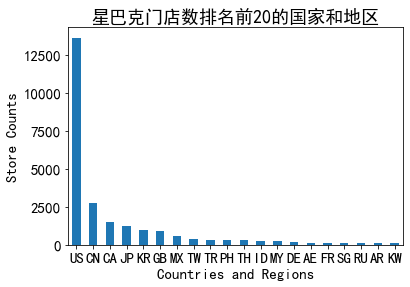

In [6]:
#(3)用柱状图绘制前20名的分布情况
plt.rcParams['font.size']=15
plt.rcParams['font.family']='SimHei'
df1.head(20).plot(kind='bar',rot=0)
plt.title('星巴克门店数排名前20的国家和地区')
plt.ylabel('Store Counts')
plt.xlabel('Countries and Regions')

In [9]:
#(4)显示拥有星巴克门店数量排名前20的城市
count_starbucks_city=coffee.City.value_counts()
print("星巴克门店数量排名前20的城市：\n",
     count_starbucks_city.head(20))
star=starbucks.dropna(how='any',subset=['City'])
count_starbucks_city=star.City.value_counts()
print("\n全世界星巴克门店数量排名前20的城市：\n",
     count_starbucks_city.head(20))

星巴克门店数量排名前20的城市：
 上海市            542
Seoul          243
北京市            234
New York       230
London         215
Toronto        186
Mexico City    180
Chicago        179
Las Vegas      153
Houston        151
Seattle        151
Istanbul       144
Vancouver      140
서울             136
San Diego      134
Singapore      127
Taipei City    126
Los Angeles    125
Calgary        125
Jakarta        123
Name: City, dtype: int64

全世界星巴克门店数量排名前20的城市：
 上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Las Vegas      156
Seattle        156
Houston        154
Istanbul       144
Vancouver      141
서울             136
San Diego      135
Calgary        130
Los Angeles    127
Singapore      127
Taipei City    126
Jakarta        123
Name: City, dtype: int64


Text(0.5, 0, 'City')

C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0, flags=flags)


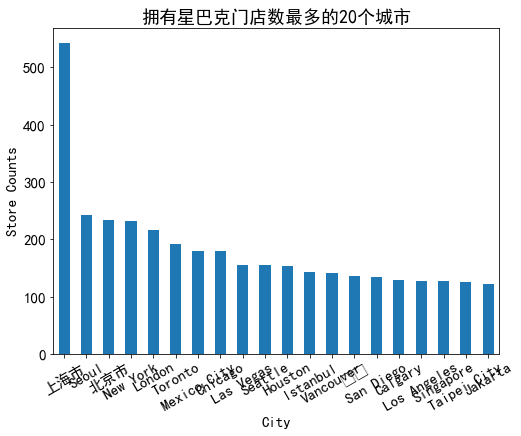

In [11]:
#(5)绘制星巴克门店数前20的城市分布柱状图
plt.figure(1,figsize=(8,6))
count_starbucks_city=star.City.value_counts()
city_top10=count_starbucks_city.head(20)
city_top10.plot(kind='bar',rot=30)
plt.title('拥有星巴克门店数最多的20个城市')
plt.ylabel('Store Counts')
plt.xlabel('City')

In [12]:
#(6)按照星巴克门店在中国的分布情况，统计排名前20的城市
import pinyin
#选择中国的数据
df=star[star["Country"]=="CN"]
df1=df.copy()
#将城市名改为小写
df1["City"]=df1["City"].apply(lambda x:x.lower())
#将汉字城市改为小写拼音，去掉“市”的拼音
df1["City"]=df1["City"].apply(
lambda x:pinyin.get(x,format="strip",delimiter="")[0:-3])
#统计每个城市的星巴克门数数量
df1=df1.groupby(["City"]).size().sort_values(ascending=False)
df1.head(20)

ModuleNotFoundError: No module named 'pinyin'

Text(0.5, 0, 'Cities')

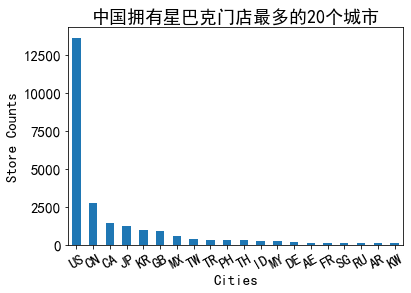

In [13]:
#(7)绘制柱状图
df1.head(20).plot(kind='bar',rot=30)
plt.title('中国拥有星巴克门店最多的20个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')

<AxesSubplot:title={'center':'星巴克门店所有权类型'}, ylabel='Ownership Type'>

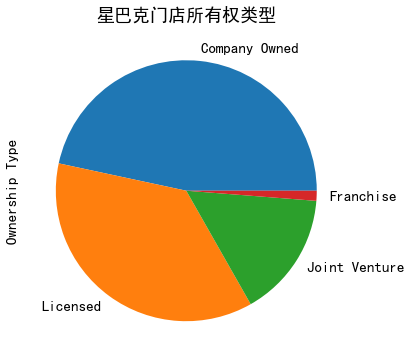

In [14]:
#(8)用饼状图显示星巴克门店的经营方式有哪几种
plt.figure(1,figsize=(8,6))
ownership=star['Ownership Type'].value_counts()
plt.title('星巴克门店所有权类型')
ownership.plot(kind='pie')